In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### [ATR-CNN] grid search 결과 불러오기

In [2]:
Grid_search_result_ATR_SG_0D = pd.read_csv('[Grid search]/Training_result_ATR_0D.csv')
Grid_search_result_ATR_SG_0D.sort_values(by='Accuracy', ascending=False).head(10)

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
2,2.0,3.0,18.0,0.001,1.000000
3,3.0,3.0,21.0,0.001,1.000000
17,17.0,20.0,12.0,0.001,1.000000
6,6.0,4.0,18.0,0.001,1.000000
7,7.0,4.0,21.0,0.001,1.000000
8,8.0,5.0,6.0,0.001,1.000000
9,9.0,5.0,12.0,0.001,1.000000
1,1.0,3.0,12.0,0.001,1.000000
0,0.0,3.0,6.0,0.001,0.981818
11,11.0,5.0,21.0,0.001,0.981818


In [6]:
Grid_search_result_ATR_SG_1D = pd.read_csv('[Grid search]/Training_result_ATR_1D.csv')
Grid_search_result_ATR_SG_1D.sort_values(by='Accuracy', ascending=False).head(10)

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
0,0.0,3.0,6.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0
13,13.0,10.0,12.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0
1,1.0,3.0,12.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
10,10.0,5.0,18.0,0.001,1.0
6,6.0,4.0,18.0,0.001,1.0
5,5.0,4.0,12.0,0.001,1.0
2,2.0,3.0,18.0,0.001,1.0


In [4]:
Grid_search_result_ATR_SG_2D = pd.read_csv('[Grid search]/Training_result_ATR_2D.csv')
Grid_search_result_ATR_SG_2D.sort_values(by='Accuracy', ascending=False).head(10)

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
13,13.0,10.0,12.0,0.001,1.0
2,2.0,3.0,18.0,0.001,1.0
3,3.0,3.0,21.0,0.001,1.0
4,4.0,4.0,6.0,0.001,1.0
6,6.0,4.0,18.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0
14,14.0,10.0,18.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
1,1.0,3.0,12.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0


### [Trans-CNN] grid search 결과 불러오기

In [7]:
Grid_search_result_Trans_SG_0D = pd.read_csv('[Grid search]/Training_result_Trans_0D.csv')
Grid_search_result_Trans_SG_0D.sort_values(by='Accuracy', ascending=False).head(10)

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
10,10.0,5.0,18.0,0.001,1.0
8,8.0,5.0,6.0,0.001,1.0
18,18.0,20.0,18.0,0.001,1.0
15,15.0,10.0,21.0,0.001,1.0
14,14.0,10.0,18.0,0.001,1.0
13,13.0,10.0,12.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
19,19.0,20.0,21.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0


In [8]:
Grid_search_result_Trans_SG_1D = pd.read_csv('[Grid search]/Training_result_Trans_1D.csv')
Grid_search_result_Trans_SG_1D.sort_values(by='Accuracy', ascending=False).head(10)

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
10,10.0,5.0,18.0,0.001,1.0
8,8.0,5.0,6.0,0.001,1.0
18,18.0,20.0,18.0,0.001,1.0
15,15.0,10.0,21.0,0.001,1.0
14,14.0,10.0,18.0,0.001,1.0
13,13.0,10.0,12.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
19,19.0,20.0,21.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0


In [9]:
Grid_search_result_Trans_SG_2D = pd.read_csv('[Grid search]/Training_result_Trans_2D.csv')
Grid_search_result_Trans_SG_2D.sort_values(by='Accuracy', ascending=False).head(10)

,Case,Kernel_S,Dense_N,Learn_R,Accuracy
10,10.0,5.0,18.0,0.001,1.0
8,8.0,5.0,6.0,0.001,1.0
18,18.0,20.0,18.0,0.001,1.0
15,15.0,10.0,21.0,0.001,1.0
14,14.0,10.0,18.0,0.001,1.0
13,13.0,10.0,12.0,0.001,1.0
11,11.0,5.0,21.0,0.001,1.0
9,9.0,5.0,12.0,0.001,1.0
19,19.0,20.0,21.0,0.001,1.0
7,7.0,4.0,21.0,0.001,1.0


## [ATR-CNN] Grid search result (L.Rate 기준)

In [22]:
K_S = [3, 4, 5, 10, 20]
D_N = [6, 12, 18, 21]
SGD = ['_SG_0D','_SG_1D','_SG_2D']

LearnR_0D = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])
LearnR_1D = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])
LearnR_2D = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])

for k, Dim in enumerate(SGD):
    cnt=0
    for i in K_S:
        for j in D_N:
            
            exec("temp_result = Grid_search_result_ATR" + Dim)
            
            temp = temp_result[(temp_result['Kernel_S'] == i) & 
                               (temp_result['Dense_N'] == j)]
            exec("LearnR_%dD.iloc[%d,:] = temp.iloc[0,:]"%(k, cnt))
            cnt+=1
            
LearnR_0D_mtx_ATR = LearnR_0D.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')
LearnR_1D_mtx_ATR = LearnR_1D.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')
LearnR_2D_mtx_ATR = LearnR_2D.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')

LearnR_1D_mtx_ATR

Dense_N,6.0,12.0,18.0,21.0
Kernel_S,,,,
3.0,1.000000,1.000000,1.000000,0.945455
4.0,0.818182,1.000000,1.000000,1.000000
5.0,0.909091,1.000000,1.000000,1.000000
10.0,0.363636,1.000000,0.872727,0.963636
20.0,0.909091,0.981818,0.872727,0.981818


4.5 0.5


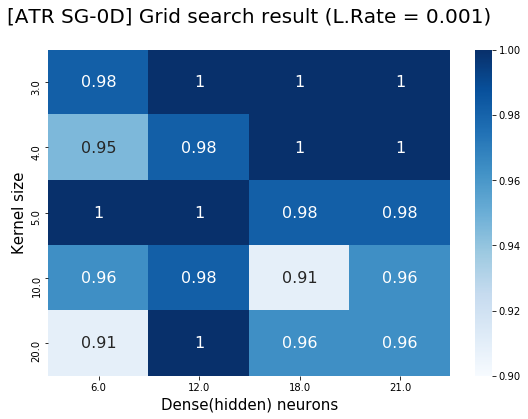

In [31]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(LearnR_0D_mtx_ATR,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.9, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('[ATR SG-0D] Grid search result (L.Rate = 0.001)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

buttom, top = ax.get_ylim()
print(buttom, top)
ax.set_ylim(buttom+0.5, top-0.5)

plt.savefig('[Grid search]/Heatmaps/[ATR] SG-0D.png')
plt.show()

4.5 0.5


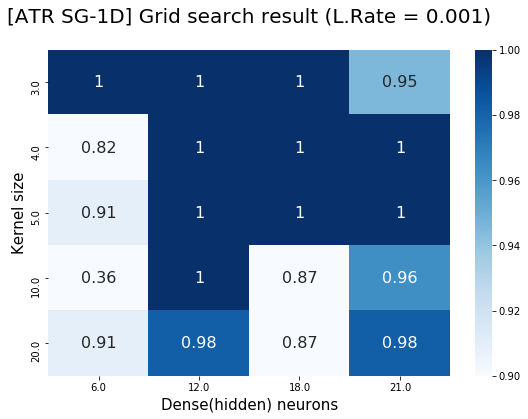

In [32]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(LearnR_1D_mtx_ATR,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.9, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('[ATR SG-1D] Grid search result (L.Rate = 0.001)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

buttom, top = ax.get_ylim()
print(buttom, top)
ax.set_ylim(buttom+0.5, top-0.5)

plt.savefig('[Grid search]/Heatmaps/[ATR] SG-1D.png')
plt.show()

4.5 0.5


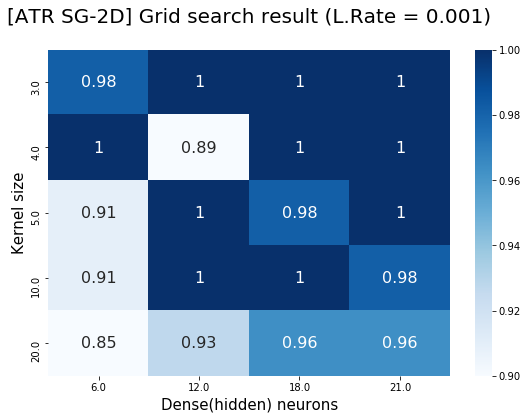

In [33]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(LearnR_2D_mtx_ATR,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.9, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('[ATR SG-2D] Grid search result (L.Rate = 0.001)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

buttom, top = ax.get_ylim()
print(buttom, top)
ax.set_ylim(buttom+0.5, top-0.5)

plt.savefig('[Grid search]/Heatmaps/[ATR] SG-2D.png')
plt.show()

## [Trans-CNN] Grid search result (L.Rate 기준)

In [34]:
K_S = [3, 4, 5, 10, 20]
D_N = [6, 12, 18, 21]
SGD = ['_SG_0D','_SG_1D','_SG_2D']

LearnR_0D = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])
LearnR_1D = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])
LearnR_2D = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])

for k, Dim in enumerate(SGD):
    cnt=0
    for i in K_S:
        for j in D_N:
            
            exec("temp_result = Grid_search_result_Trans" + Dim)
            
            temp = temp_result[(temp_result['Kernel_S'] == i) & 
                               (temp_result['Dense_N'] == j)]
            exec("LearnR_%dD.iloc[%d,:] = temp.iloc[0,:]"%(k, cnt))
            cnt+=1
            
LearnR_0D_mtx_Trans = LearnR_0D.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')
LearnR_1D_mtx_Trans = LearnR_1D.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')
LearnR_2D_mtx_Trans = LearnR_2D.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')

LearnR_1D_mtx_Trans

Dense_N,6.0,12.0,18.0,21.0
Kernel_S,,,,
3.0,0.982143,0.982143,1.0,1.0
4.0,1.000000,1.000000,1.0,1.0
5.0,1.000000,1.000000,1.0,1.0
10.0,0.946429,1.000000,1.0,1.0
20.0,0.875000,0.375000,1.0,1.0


4.5 0.5


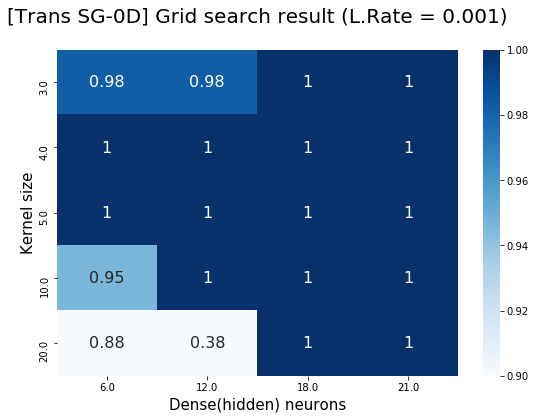

In [37]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(LearnR_0D_mtx_Trans,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.9, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('[Trans SG-0D] Grid search result (L.Rate = 0.001)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

buttom, top = ax.get_ylim()
print(buttom, top)
ax.set_ylim(buttom+0.5, top-0.5)

plt.savefig('[Grid search]/Heatmaps/[Trans] SG-0D.png')
plt.show()

4.5 0.5


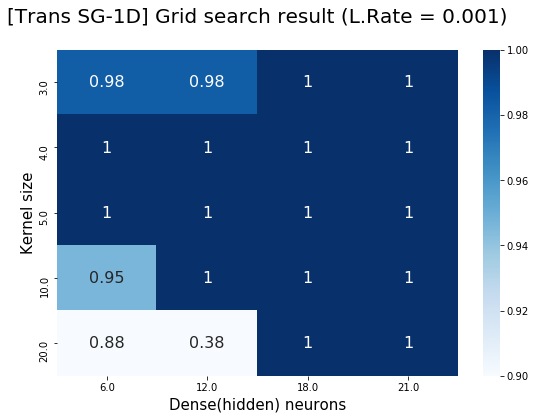

In [36]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(LearnR_1D_mtx_Trans,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.9, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('[Trans SG-1D] Grid search result (L.Rate = 0.001)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

buttom, top = ax.get_ylim()
print(buttom, top)
ax.set_ylim(buttom+0.5, top-0.5)

plt.savefig('[Grid search]/Heatmaps/[Trans] SG-1D.png')
plt.show()

4.5 0.5


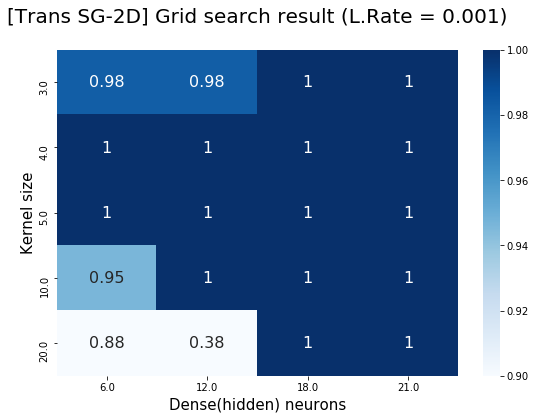

In [35]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(LearnR_2D_mtx_Trans,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.9, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('[Trans SG-2D] Grid search result (L.Rate = 0.001)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

buttom, top = ax.get_ylim()
print(buttom, top)
ax.set_ylim(buttom+0.5, top-0.5)

plt.savefig('[Grid search]/Heatmaps/[Trans] SG-2D.png')
plt.show()

## [ATR] Grid search result (Kernel-Dense)

In [ ]:
K_S = [3, 4, 5, 10, 20]
D_N = [6, 12, 18, 21]

KernelS_DenseN = pd.DataFrame(np.zeros((len(K_S)*len(D_N),3)), columns=['Kernel_S','Dense_N','Accuracy'])

cnt = 0
for i in K_S:
    for j in D_N:
        temp = Grid_search_result_ATR[(Grid_search_result_ATR['Kernel_S'] == i) & (Grid_search_result_ATR['Dense_N'] == j)]
        acc_mean = np.mean(temp.iloc[:,4])
        
        KernelS_DenseN.iloc[cnt,0] = i
        KernelS_DenseN.iloc[cnt,1] = j
        KernelS_DenseN.iloc[cnt,2] = acc_mean
        
        cnt+=1
        
KernelS_DenseN_mtx = KernelS_DenseN.pivot(index='Kernel_S', columns='Dense_N', values='Accuracy')
KernelS_DenseN_mtx

In [ ]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(KernelS_DenseN_mtx,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin = 0.9)

ax.set_title('[ATR] Grid search result (Kernel-Dense)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Dense(hidden) neurons', fontsize=15)

plt.show()

## [ATR] Grid search result (Kernel-L.Rate)

In [ ]:
K_S = [3, 4, 5, 10, 20]
L_R = [0.0001, 0.001, 0.01]

KernelS_LearnR = pd.DataFrame(np.zeros((len(K_S)*len(L_R),3)), columns=['Kernel_S','Learn_R','Accuracy'])

cnt = 0
for i in K_S:
    for j in L_R:
        temp = Grid_search_result_ATR[(Grid_search_result_ATR['Kernel_S'] == i) & (Grid_search_result_ATR['Learn_R'] == j)]
        acc_mean = np.mean(temp.iloc[:,4])
        
        KernelS_LearnR.iloc[cnt,0] = i
        KernelS_LearnR.iloc[cnt,1] = j
        KernelS_LearnR.iloc[cnt,2] = acc_mean
        
        cnt+=1
        
KernelS_LearnR_mtx = KernelS_LearnR.pivot(index='Kernel_S', columns='Learn_R', values='Accuracy')
KernelS_LearnR_mtx

In [ ]:
# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(KernelS_LearnR_mtx,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin = 0.9)

ax.set_title('[ATR] Grid search result (Kernel-L.Rate)\n', fontsize=20)
ax.set_ylabel('Kernel size', fontsize=15)
ax.set_xlabel('Learning rate', fontsize=15)

plt.show()